In [ ]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [5]:
# Chargement et préparation des données
# Importation du dataset
df = pd.read_csv("Mall_Customers.csv")

# Inspection des premières propriétés
print("=== PREMIÈRES LIGNES ===")
print(df.head())

print("\n=== INFORMATIONS SUR LE DATASET ===")
print(df.info())

print("\n=== RÉSUMÉ STATISTIQUE ===")
print(df.describe())

# Vérification des valeurs manquantes
print("\n=== VALEURS MANQUANTES ===")
print(df.isnull().sum())

# Renommage des colonnes pour plus de clarté
df = df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'spendingScore'
})

print("\n=== NOUVEAUX NOMS DE COLONNES ===")
print(df.columns.tolist())

=== PREMIÈRES LIGNES ===
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

=== INFORMATIONS SUR LE DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.

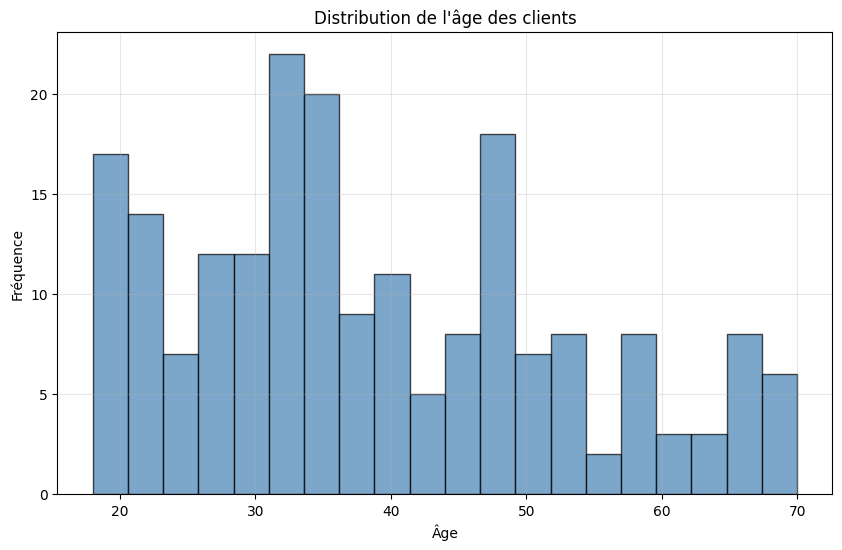

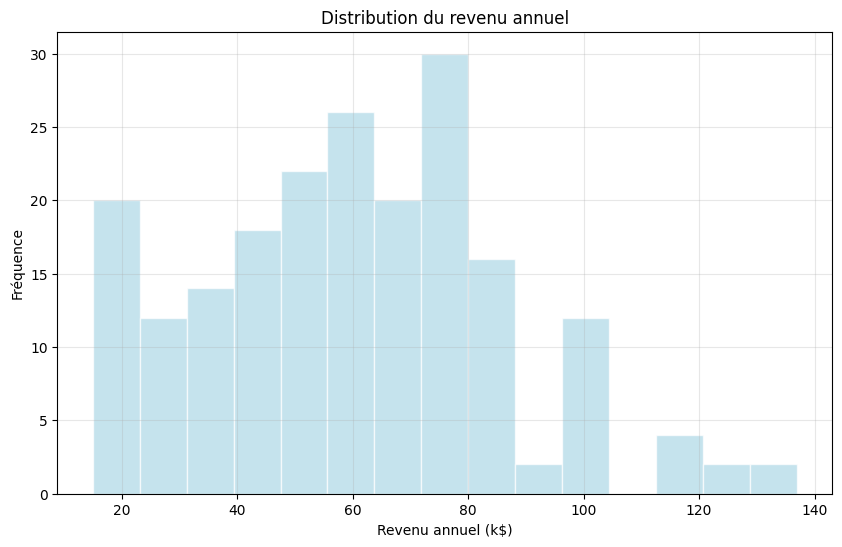

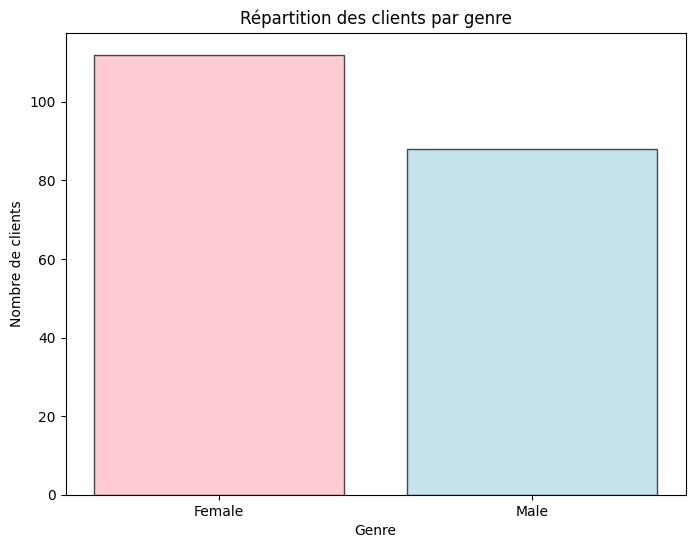

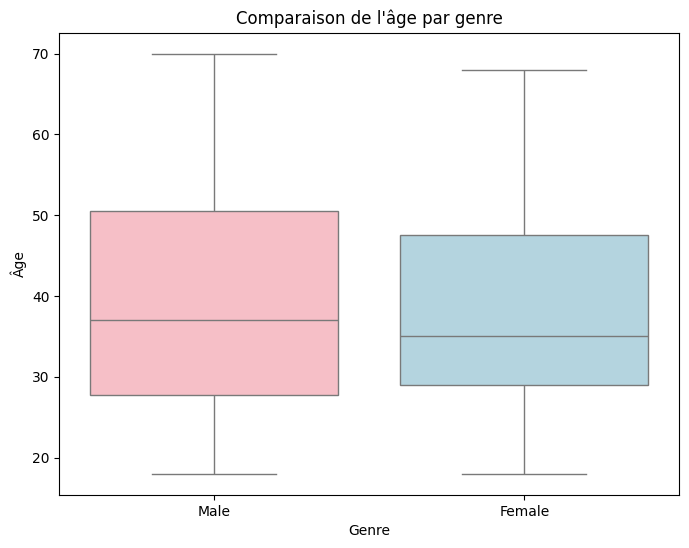

In [6]:
# Visualisation de variables individuelles

# 1. Histogramme de l'âge des clients
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='steelblue', alpha=0.7, edgecolor='black')
plt.title('Distribution de l\'âge des clients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Histogramme du revenu annuel
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=15, color='lightblue', alpha=0.7, edgecolor='white')
plt.title('Distribution du revenu annuel')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Barplot de la répartition des clients selon le genre
plt.figure(figsize=(8, 6))
genre_counts = df['Genre'].value_counts()
colors = ['lightpink', 'lightblue']
plt.bar(genre_counts.index, genre_counts.values, color=colors, alpha=0.7, edgecolor='black')
plt.title('Répartition des clients par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de clients')
plt.show()

# 4. Boxplot comparant l'âge des hommes et des femmes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='Age', data=df, palette=['lightpink', 'lightblue'])
plt.title('Comparaison de l\'âge par genre')
plt.xlabel('Genre')
plt.ylabel('Âge')
plt.show()

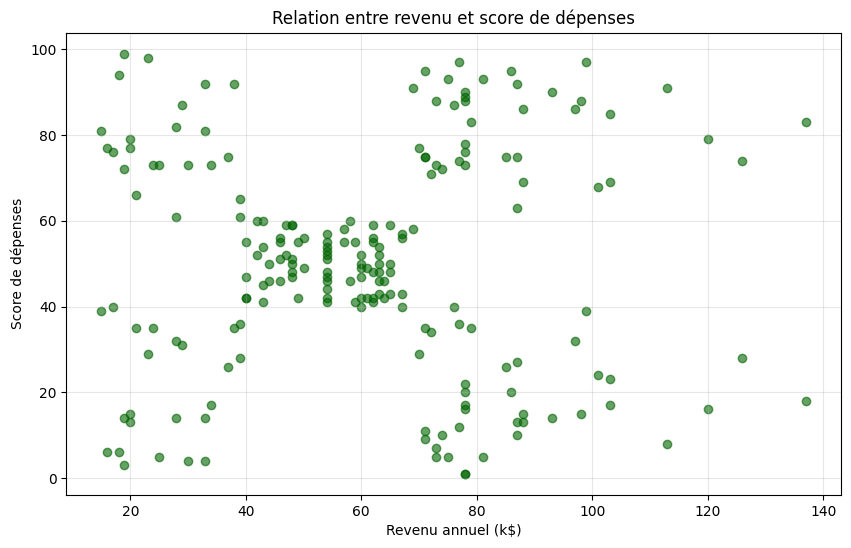

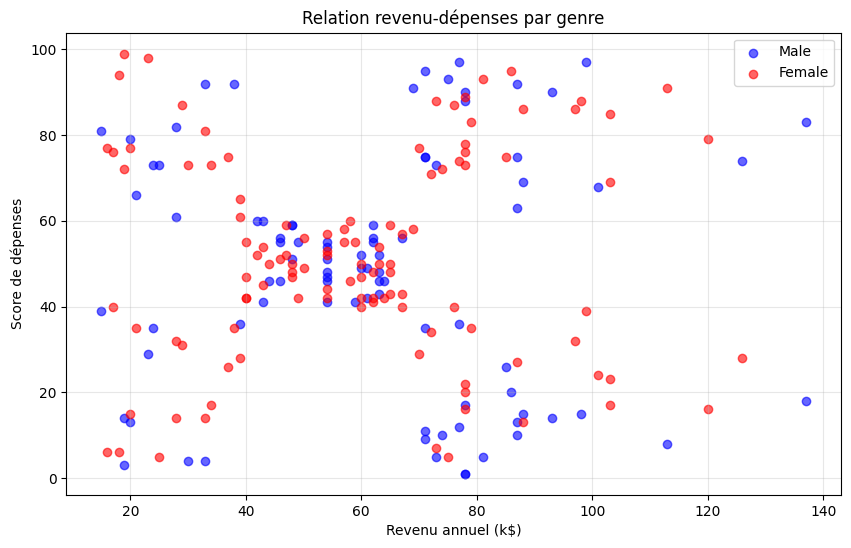

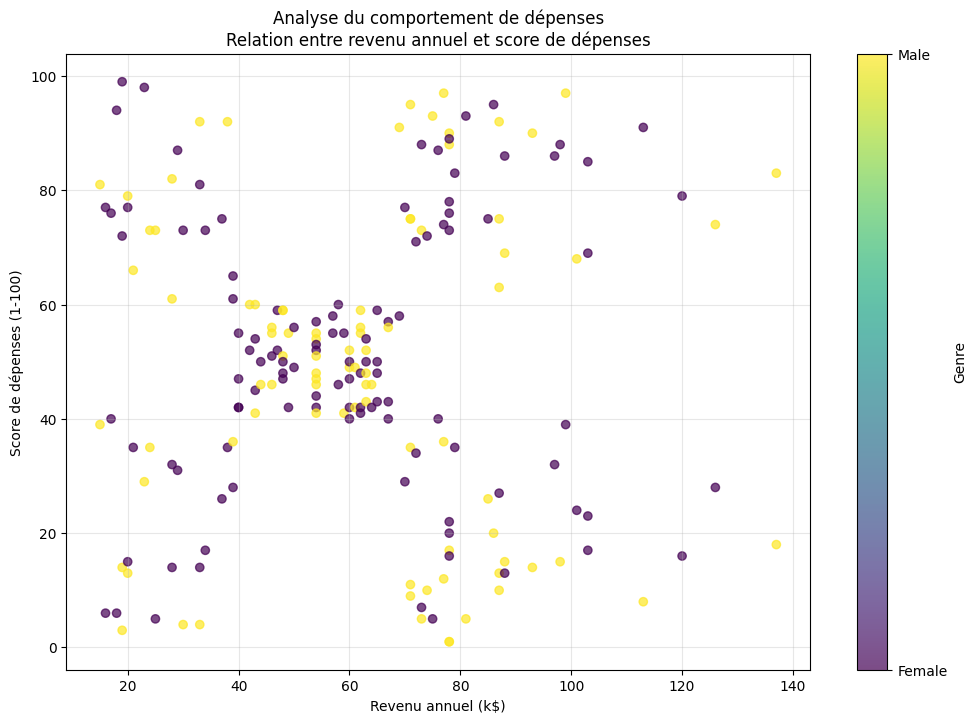

In [7]:
# Visualisation de relations entre variables

# 1. Scatter plot revenu vs spending score
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['spendingScore'], color='darkgreen', alpha=0.6)
plt.title('Relation entre revenu et score de dépenses')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Score de dépenses')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Scatter plot coloré par genre
plt.figure(figsize=(10, 6))
colors = {'Female': 'red', 'Male': 'blue'}
for genre in df['Genre'].unique():
    subset = df[df['Genre'] == genre]
    plt.scatter(subset['Income'], subset['spendingScore'], 
                color=colors[genre], alpha=0.6, label=genre)
plt.title('Relation revenu-dépenses par genre')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Score de dépenses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Scatter avec titre et labels améliorés
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Income'], df['spendingScore'], 
                     c=df['Genre'].map({'Female': 0, 'Male': 1}), 
                     cmap='viridis', alpha=0.7)
plt.title('Analyse du comportement de dépenses\nRelation entre revenu annuel et score de dépenses')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Score de dépenses (1-100)')
cbar = plt.colorbar(scatter)
cbar.set_label('Genre')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Female', 'Male'])
plt.grid(True, alpha=0.3)
plt.show()

=== MATRICE DE CORRÉLATION ===
                 Income       Age  spendingScore
Income         1.000000 -0.012398       0.009903
Age           -0.012398  1.000000      -0.327227
spendingScore  0.009903 -0.327227       1.000000


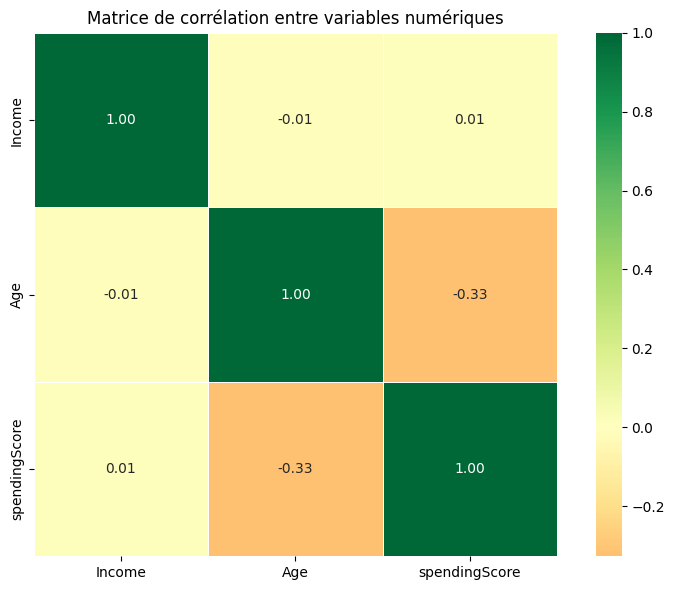

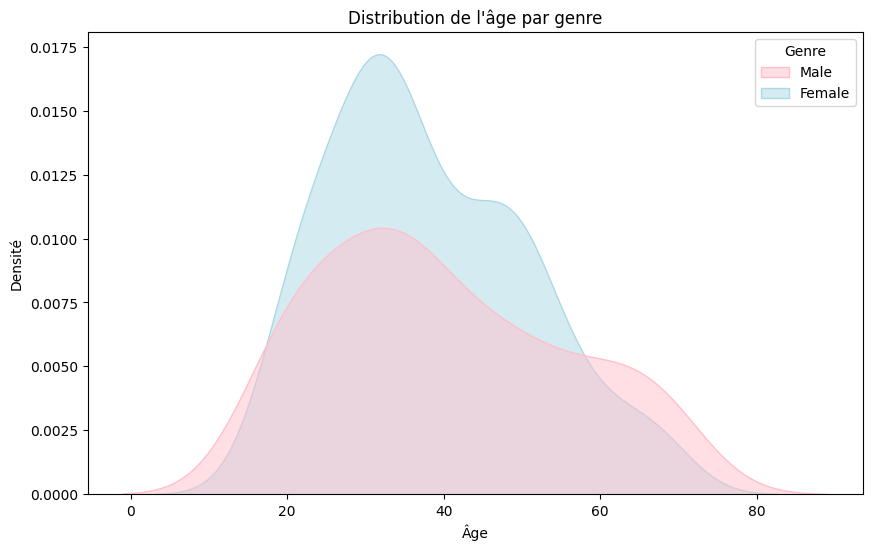

In [8]:
# Analyse avancée Matrice de corrélation

# 1. Matrice de corrélation
df_num = df[['Income', 'Age', 'spendingScore']]
mcor = df_num.corr()
print("=== MATRICE DE CORRÉLATION ===")
print(mcor)

# 2. Heatmap de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(mcor, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Matrice de corrélation entre variables numériques')
plt.tight_layout()
plt.show()

# 3. Density plot de l'âge selon le genre
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Genre', fill=True, alpha=0.5, palette=['pink', 'lightblue'])
plt.title('Distribution de l\'âge par genre')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.show()

In [10]:
!pip install nbformat>=4.2.0
!pip install plotly

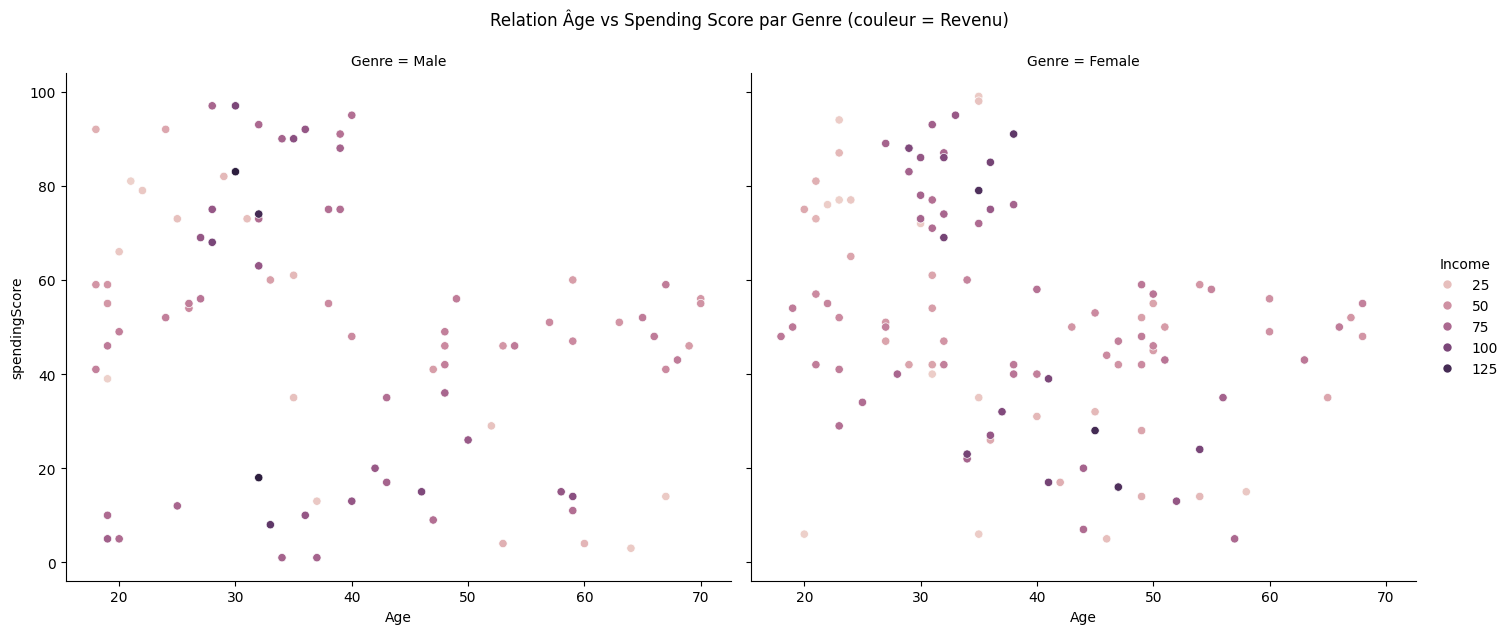

In [13]:
# Visualisation 3D
fig = px.scatter_3d(df, 
                    x='Age', 
                    y='Income', 
                    z='spendingScore',
                    color='Genre',
                    color_discrete_map={'Female': 'pink', 'Male': 'lightblue'},
                    title='Visualisation 3D: Âge, Revenu et Score de Dépenses',
                    labels={'Age': 'Âge', 'Income': 'Revenu (k$)', 'spendingScore': 'Score de Dépenses'})
fig.update_traces(marker=dict(size=5))
fig.show()

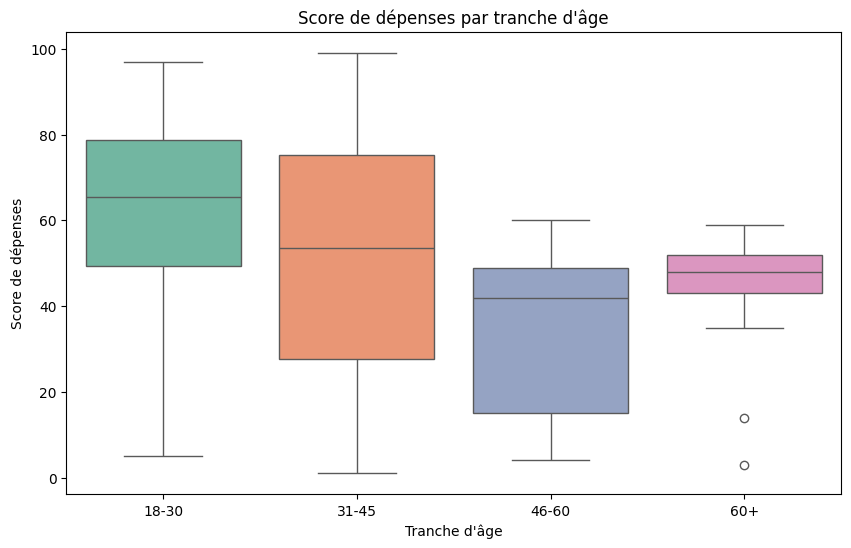

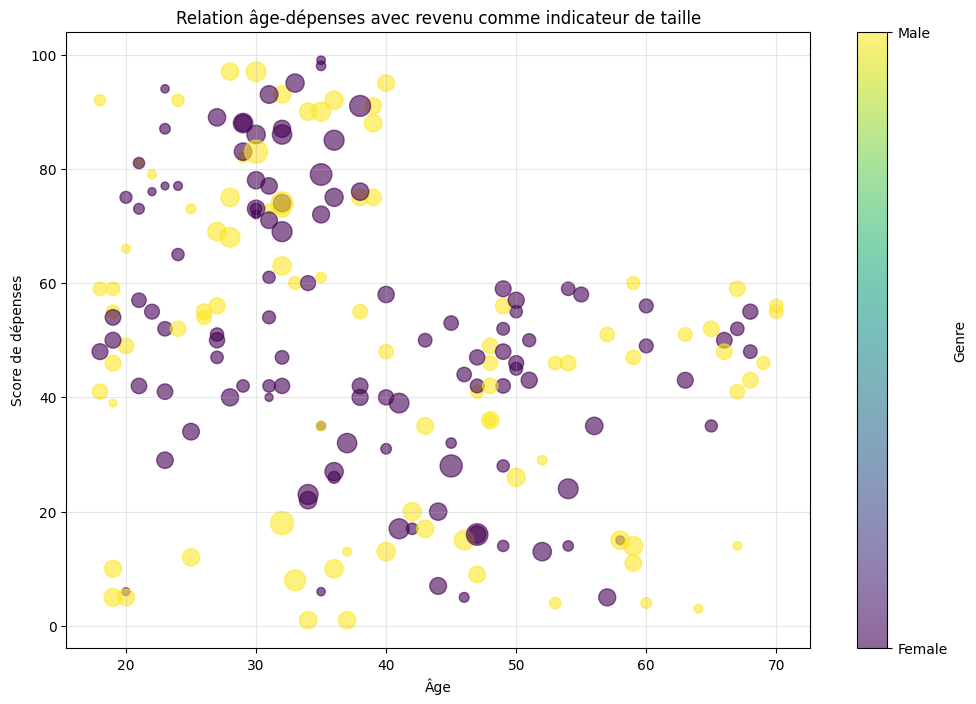

In [14]:
# Analyses complémentaires Segmentation par âge

# 1. Création de groupes d'âge
bins = [18, 30, 45, 60, float('inf')]
labels = ['18-30', '31-45', '46-60', '60+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Boxplot du score de dépenses par groupe d'âge
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='spendingScore', data=df, palette='Set2')
plt.title('Score de dépenses par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Score de dépenses')
plt.show()

# 2. Scatter plot Age vs Spending avec taille selon le revenu
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Age'], df['spendingScore'], 
                     c=df['Genre'].map({'Female': 0, 'Male': 1}), 
                     s=df['Income']*2, alpha=0.6, cmap='viridis')
plt.title('Relation âge-dépenses avec revenu comme indicateur de taille')
plt.xlabel('Âge')
plt.ylabel('Score de dépenses')
cbar = plt.colorbar(scatter)
cbar.set_label('Genre')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Female', 'Male'])
plt.grid(True, alpha=0.3)
plt.show()

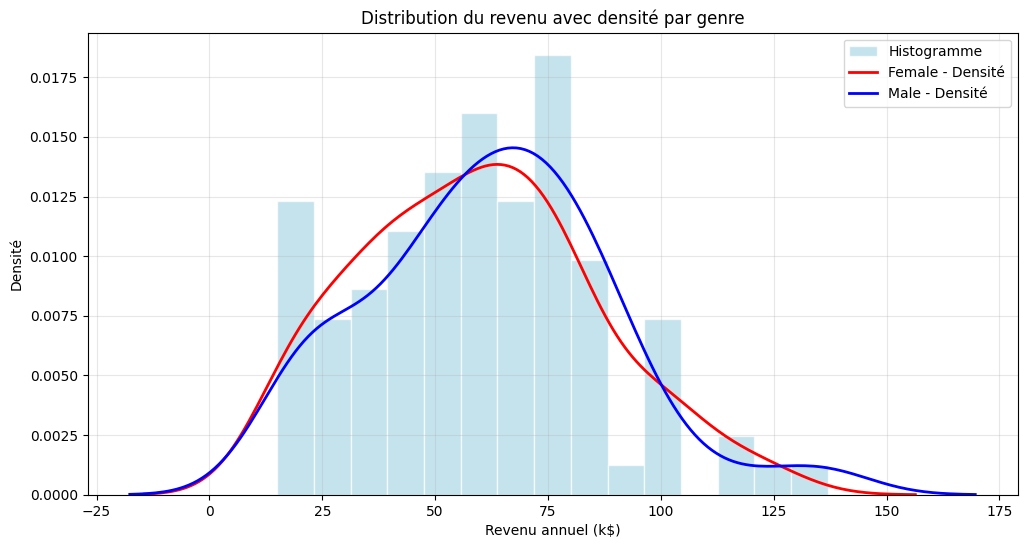

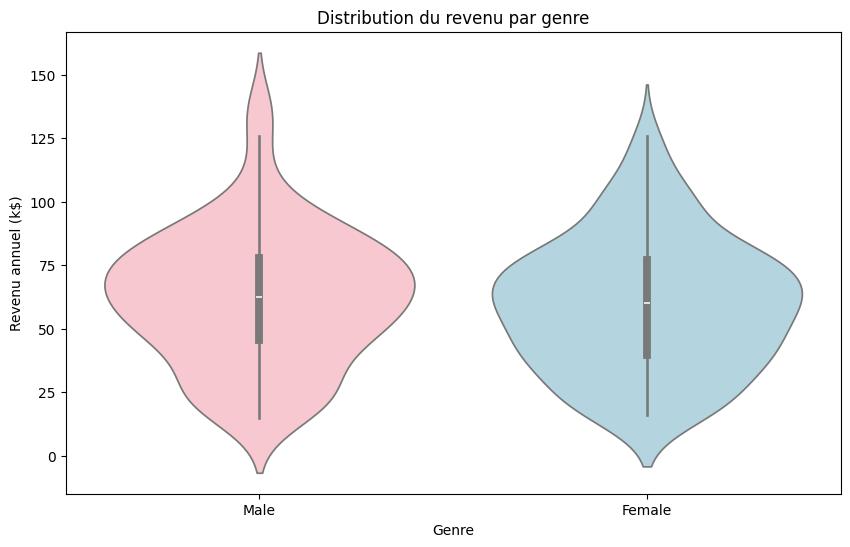

In [15]:
# Analyses complémentaires - Distributions

# 3. Histogramme avec courbe de densité superposée
plt.figure(figsize=(12, 6))

# Histogramme
plt.hist(df['Income'], bins=15, density=True, color='lightblue', 
         alpha=0.7, edgecolor='white', label='Histogramme')

# Courbes de densité par genre
for genre, color in [('Female', 'red'), ('Male', 'blue')]:
    subset = df[df['Genre'] == genre]
    sns.kdeplot(subset['Income'], color=color, label=f'{genre} - Densité', linewidth=2)

plt.title('Distribution du revenu avec densité par genre')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Densité')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Violin plot comparant le revenu par genre
plt.figure(figsize=(10, 6))
sns.violinplot(x='Genre', y='Income', data=df, palette=['pink', 'lightblue'], inner='box')
plt.title('Distribution du revenu par genre')
plt.xlabel('Genre')
plt.ylabel('Revenu annuel (k$)')
plt.show()

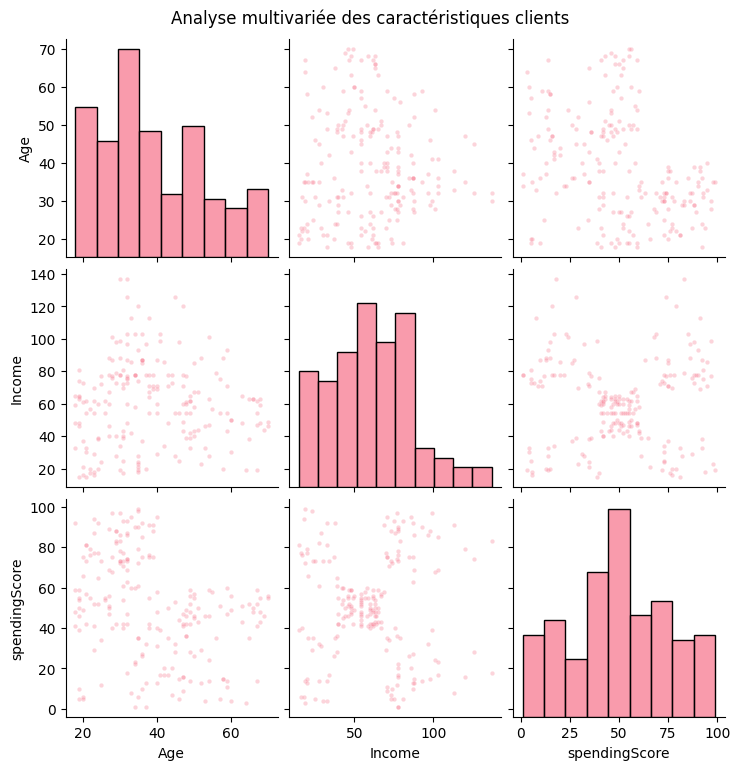

In [16]:
# Pairplot des variables principales
sns.pairplot(df[['Age', 'Income', 'spendingScore']], 
             diag_kind='hist', 
             plot_kws={'alpha': 0.3, 's': 10},
             diag_kws={'alpha': 0.7})
plt.suptitle('Analyse multivariée des caractéristiques clients', y=1.02)
plt.show()

In [17]:
# Cellule 10: Résumé statistique final
print("=== RÉSUMÉ STATISTIQUE FINAL ===")
print(df.describe())

print("\n=== RÉPARTITION PAR GENRE ===")
print(df['Genre'].value_counts())

print("\n=== RÉPARTITION PAR TRANCHE D'ÂGE ===")
print(df['age_group'].value_counts().sort_index())

=== RÉSUMÉ STATISTIQUE FINAL ===
       CustomerID         Age      Income  spendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

=== RÉPARTITION PAR GENRE ===
Genre
Female    112
Male       88
Name: count, dtype: int64

=== RÉPARTITION PAR TRANCHE D'ÂGE ===
age_group
18-30    58
31-45    72
46-60    49
60+      17
Name: count, dtype: int64


=== STATISTIQUES DES SCORES DE DÉPENSES PAR GENRE ===
        Moyenne  Médiane  Écart_type  Minimum  Maximum  Effectif
Genre                                                           
Female    51.53     50.0       24.11        5       99       112
Male      48.51     50.0       27.90        1       97        88

=== TEST T POUR ÉCHANTILLONS INDÉPENDANTS ===
Statistique t: 0.8190
P-value: 0.4137
Différence significative: NON


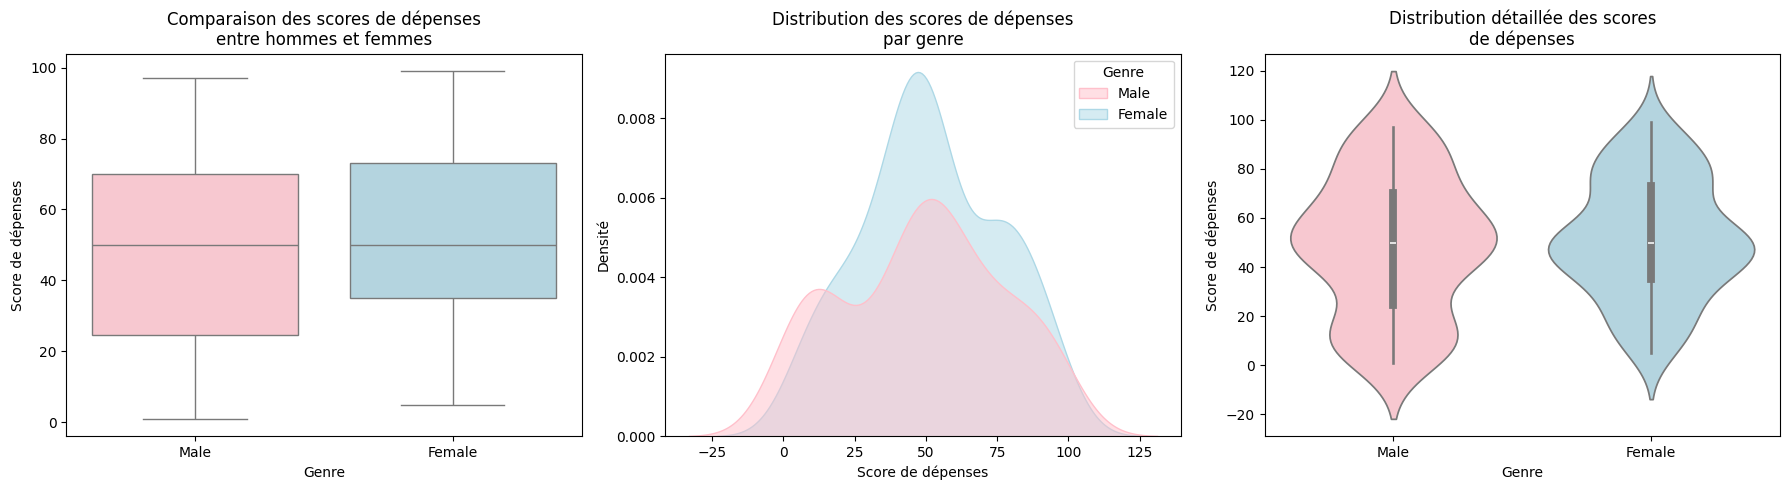

In [18]:
# Analyse statistique des dépenses par genre

# 1. Statistiques descriptives par genre
spending_stats = df.groupby('Genre')['spendingScore'].agg([
    ('Moyenne', 'mean'),
    ('Médiane', 'median'),
    ('Écart_type', 'std'),
    ('Minimum', 'min'),
    ('Maximum', 'max'),
    ('Effectif', 'count')
]).round(2)

print("=== STATISTIQUES DES SCORES DE DÉPENSES PAR GENRE ===")
print(spending_stats)

# 2. Test statistique pour comparer les distributions
female_scores = df[df['Genre'] == 'Female']['spendingScore']
male_scores = df[df['Genre'] == 'Male']['spendingScore']

t_stat, p_value = stats.ttest_ind(female_scores, male_scores)
print(f"\n=== TEST T POUR ÉCHANTILLONS INDÉPENDANTS ===")
print(f"Statistique t: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Différence significative: {'OUI' if p_value < 0.05 else 'NON'}")

# 3. Visualisations comparatives
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot
sns.boxplot(x='Genre', y='spendingScore', data=df, ax=axes[0], palette=['pink', 'lightblue'])
axes[0].set_title('Comparaison des scores de dépenses\nentre hommes et femmes')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Score de dépenses')

# Density plot
sns.kdeplot(data=df, x='spendingScore', hue='Genre', fill=True, alpha=0.5, 
            ax=axes[1], palette=['pink', 'lightblue'])
axes[1].set_title('Distribution des scores de dépenses\npar genre')
axes[1].set_xlabel('Score de dépenses')
axes[1].set_ylabel('Densité')

# Violin plot
sns.violinplot(x='Genre', y='spendingScore', data=df, ax=axes[2], 
               palette=['pink', 'lightblue'], inner='box')
axes[2].set_title('Distribution détaillée des scores\nde dépenses')
axes[2].set_xlabel('Genre')
axes[2].set_ylabel('Score de dépenses')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
# Importation du dataset de peak ccuu complet
df_pc = pd.read_csv(r"C:\Users\bongu\Documents\GAMEDATA360\data\nettoyes\jeux_confirmes_peak_complet.csv")

In [2]:
df_pc[df_pc['Peak CCU']== df_pc['Peak CCU'].max()]

,AppID,Name,Release date,Estimated owners,Price,Peak CCU,User score,Positive,Negative,Metacritic score,...,Developers,Publishers,Genres,Tags,Categories,Windows,Mac,Linux,Website,published
102104,2246340,Monster Hunter Wilds,2025-02-27,0 - 20000,69.99,1311366.0,0,29382,30726,0,...,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.","Action,Adventure,RPG","Hunting,Action,Multiplayer,Co-op,Online Co-Op,...","Single-player,Multi-player,Co-op,Online Co-op,...",1,0,0,https://www.monsterhunter.com/wilds/,1


In [3]:
#affichage du max peak_ccu Amine

max_peak_ccu = df_pc["Peak CCU"].max()
print(max_peak_ccu)

#Row
max_peak_ccu_row = df_pc[df_pc['Peak CCU']== max_peak_ccu]
max_peak_ccu_row

1311366.0


,AppID,Name,Release date,Estimated owners,Price,Peak CCU,User score,Positive,Negative,Metacritic score,...,Developers,Publishers,Genres,Tags,Categories,Windows,Mac,Linux,Website,published
102104,2246340,Monster Hunter Wilds,2025-02-27,0 - 20000,69.99,1311366.0,0,29382,30726,0,...,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.","Action,Adventure,RPG","Hunting,Action,Multiplayer,Co-op,Online Co-Op,...","Single-player,Multi-player,Co-op,Online Co-op,...",1,0,0,https://www.monsterhunter.com/wilds/,1


In [4]:
#row avec ID = 899970

df_pc[df_pc['AppID'] == 899970]

,AppID,Name,Release date,Estimated owners,Price,Peak CCU,User score,Positive,Negative,Metacritic score,...,Developers,Publishers,Genres,Tags,Categories,Windows,Mac,Linux,Website,published
1525,899970,NEKOPARA Extra,2018-07-26,200000 - 500000,4.99,16.0,0,3129,75,0,...,NEKO WORKs,Sekai Project,"Casual,Indie","Anime,Cute,Visual Novel,Nudity,Casual,Singlepl...","Single-player,Steam Achievements,Steam Trading...",1,0,0,NaN,1
